In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# acessar o s3 da amazon
import s3fs

In [10]:
url = "https://raw.githubusercontent.com/allanbraquiel/Stack_Labs_2_Squad_Scikit-Learn/main/datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
# aws = "s3://stacklabs02/diabetes_012_health_indicators_BRFSS2015.csv"

df = pd.read_csv(url)

In [9]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [12]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot:title={'center':'Diabetes_binary'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
       

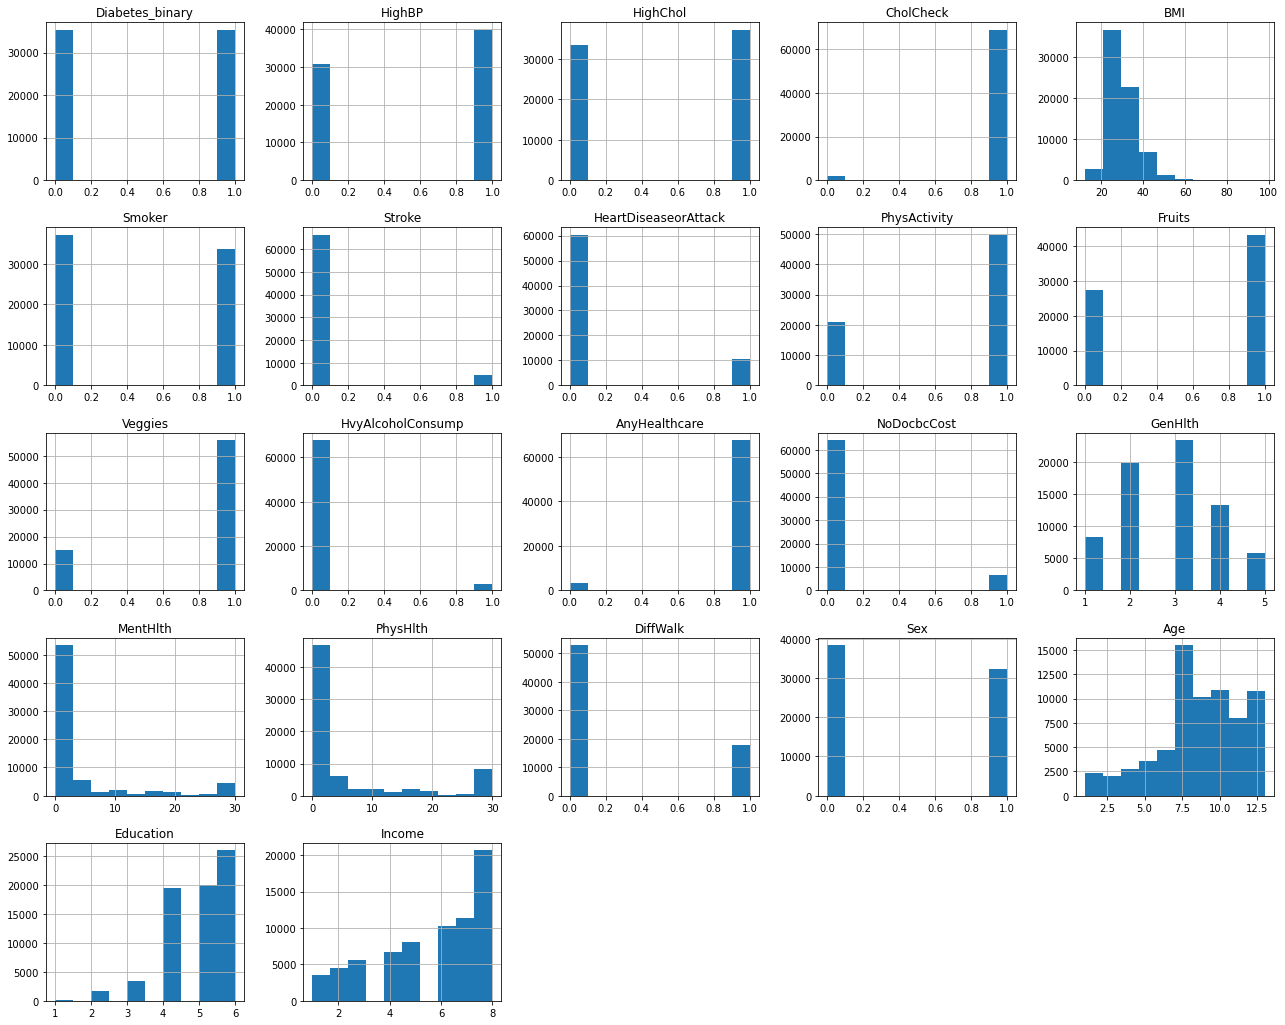

In [17]:
plt.rcParams["figure.figsize"] = [22, 18]
df.hist(bins=10)

<AxesSubplot:>

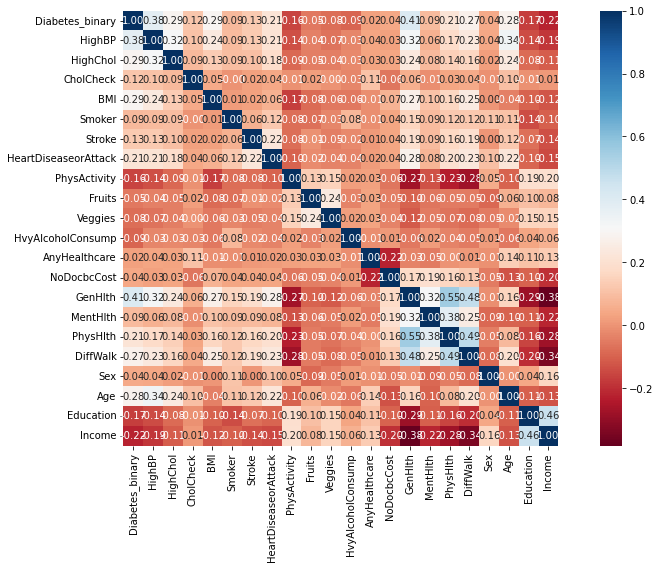

In [19]:
df_correlacao = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

In [20]:
# Separando as features

x_data1 = df.drop(["Diabetes_binary"], axis=1, inplace=False)
y_data = df["Diabetes_binary"]

In [21]:
X = (x_data1 - np.min(x_data1)) / (np.max(x_data1) - np.min(x_data1)).values
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.0
1,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.0
2,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.0
3,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.0
4,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.0


In [22]:
# separando os dados de treino e teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (49484, 21)
x test:  (21208, 21)
y train:  (49484,)
y test:  (21208,)


In [23]:
# Decision tree

from sklearn import tree
arvore = tree.DecisionTreeClassifier()

In [24]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
result = arvore.predict(x_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[7012 3589]
 [3685 6922]]
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     10601
         1.0       0.66      0.65      0.66     10607

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208



In [28]:
# Features mais importantes para o modelo

arvore.feature_importances_

array([0.14738477, 0.0212498 , 0.00544148, 0.1300718 , 0.03280616,
       0.01066345, 0.01876484, 0.0260572 , 0.03056452, 0.02513793,
       0.01003922, 0.0079402 , 0.0122831 , 0.09899986, 0.05327331,
       0.07132611, 0.01983405, 0.03015803, 0.10194783, 0.06120792,
       0.0848484 ])

In [38]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [39]:
feature_imp

HighBP                  0.147385
HighChol                0.021250
CholCheck               0.005441
BMI                     0.130072
Smoker                  0.032806
Stroke                  0.010663
HeartDiseaseorAttack    0.018765
PhysActivity            0.026057
Fruits                  0.030565
Veggies                 0.025138
HvyAlcoholConsump       0.010039
AnyHealthcare           0.007940
NoDocbcCost             0.012283
GenHlth                 0.099000
MentHlth                0.053273
PhysHlth                0.071326
DiffWalk                0.019834
Sex                     0.030158
Age                     0.101948
Education               0.061208
Income                  0.084848
dtype: float64

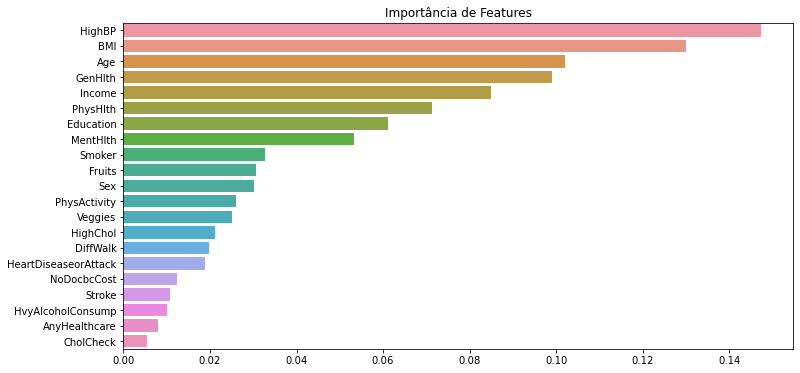

In [41]:
# Visualizando as Features mais importantes

%matplotlib inline

plt.figure(figsize=(12, 6))
feature_imp_sort = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp_sort, y=feature_imp_sort.index)
plt.title("Importância de Features")
plt.show()

In [42]:
# MLP
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu', solver='sgd', alpha=1e-05, hidden_layer_sizes=(20, 10, 20), 
                    max_iter=1000, learning_rate='adaptive', learning_rate_init=0.001)
mlp.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 20),
              learning_rate='adaptive', max_iter=1000, solver='sgd')

In [45]:
from sklearn.metrics import classification_report

result_mlp = mlp.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, result_mlp))
print("\nScore: \n", mlp.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_mlp))

Confusion Matrix:
 [[7420 3181]
 [2091 8516]]

Score: 
 0.7514145605431912

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10601
         1.0       0.73      0.80      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



In [46]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, max_depth=100, bootstrap=True, random_state=0)
rf.fit(x_train, y_train)
result_rf = rf.predict(x_test)

In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_rf))
print("\nScore: \n", rf.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_rf))

Confusion Matrix:
 [[7372 3229]
 [2293 8314]]

Score: 
 0.7396265560165975

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10601
         1.0       0.72      0.78      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208

